## Prosody Features: Statistical Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy import stats
import seaborn as sns
import statsmodels

In [2]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))
        
        
def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)


def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista


def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected


In [9]:
# Prepare data frame
prosody = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/B1_prosody.csv')
prosody1 = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/B2_prosody.csv')
prosody2 = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/FBR1_prosody.csv')
#prosody3 = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/PR1_prosody.csv')
tot = pd.concat([prosody, prosody1, prosody2])
tot = tot.drop(columns='Unnamed: 0')
tot = tot.sort_values(by='id')

intensity = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/Harmonics.csv')
intensity = intensity.drop(columns='Unnamed: 0')
intensity = intensity.sort_values(by='sound_filepath')
intensity_std = intensity['stddev_intensity'].tolist()

tot.insert(0, 'intensity_std',  intensity_std)
tot.head()[:3]

,intensity_std,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,...,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP,id
0,12.213648,189.112280,43.966045,342.781366,61.060269,-0.340074,1.187376,-35.713869,108.946918,291.016495,...,2.243528,3.14,0.15,3.063919,18.250170,0.167884,0.832116,0.271585,0.054794,CN_AGNESE_P_B1APGANRET55F170320171104.wav
0,14.120050,185.498664,43.835258,326.182020,65.486648,-0.013103,0.810485,-67.910427,178.548250,295.808803,...,1.047953,1.43,0.15,1.504852,7.893322,0.190649,0.809351,0.537828,0.126689,CN_AGNESE_P_B2APGANRET55F170320171105.wav
0,15.338148,184.895131,34.803506,272.794950,73.039020,-0.973609,1.556691,-93.124113,84.041855,303.403806,...,1.102112,1.32,0.15,1.525979,5.997140,0.254451,0.745549,0.488571,0.166746,CN_AGNESE_P_FB1APGANRET55F170320171115.wav


In [12]:
# drop_columns 
prosody = tot.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 'F0skew',
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
#'1F0std',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

prosody['label']=prosody['id'].str.split('_').str[0]

In [14]:
# Add task labels
tasks = []
names =prosody['id'].tolist()
for e in names:
    ok = e.split("_", 3)[3]
    ok = ok[:2]
    tasks.append(ok)
prosody['tasks'] = tasks
df = prosody
df = df.drop(columns=['id'])

In [15]:
# Group data by tasks 
task_grouped_= df.groupby('tasks')
B1 = task_grouped_.get_group("B1")
B2 = task_grouped_.get_group("B2")
FB1 = task_grouped_.get_group("FB") 


## Read passage

In [16]:
#B1 = B1.rename(columns={'F0std': 'F0 std\nRP task (ItalianPVS)', 'F0skew': 'F0 skew\nRP task (ItalianPVS)' })
grouped = B1.groupby("label") #here we extract the values by category

control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = B1.columns[0:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(B1.columns[0:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(B1.columns[0:-2])])

# Run pair-wise Kruskal-Wallis H-tests for each biomarkers.
with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/b1_rt_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

# Apply correction
kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/b1_rt_new.txt')
holm_correction(kruskal_1)

(['kruskal results for intensity_std controls vs. parkinson 1.0253432215872772e-08 ',
  'kruskal results for F0std controls vs. parkinson 0.0011518622789287928 '],
 [3.076029664761832e-08, 0.0017277934183931893])

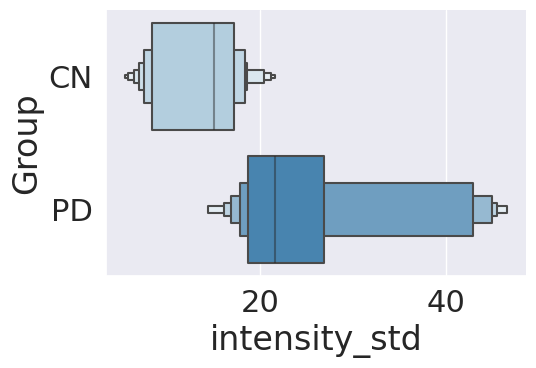

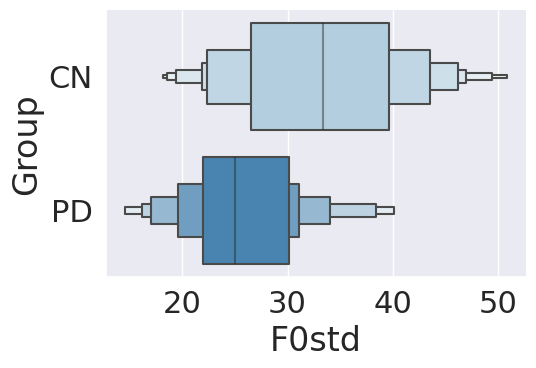

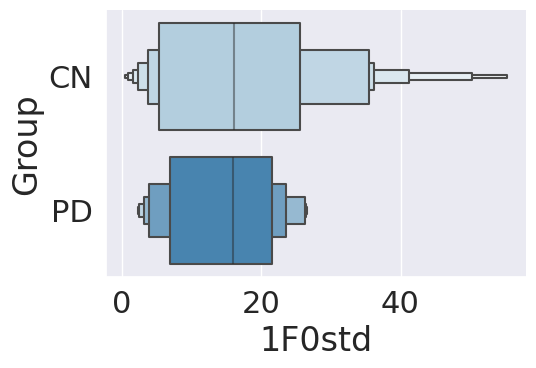

In [17]:
# Plot features 
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
   # plt.savefig(f'/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Plots/B1_{nome}', facecolor='white', dpi=600)